Iteration 0: Cost: 229.99506320026558, Weight: 0.11684321216049816, Bias: 0.1110470084306979
Iteration 1: Cost: 229.5902297900138, Weight: 0.13359050401859265, Bias: 0.1220779079033381
Iteration 2: Cost: 229.18896460993597, Weight: 0.15024243846101312, Bias: 0.1330926965515632
Iteration 3: Cost: 228.79123014204382, Weight: 0.16679957503706083, Bias: 0.14409137271276437
Iteration 4: Cost: 228.3969892949999, Weight: 0.18326246997846535, Bias: 0.15507393492648802
Iteration 5: Cost: 228.00620539912236, Weight: 0.1996316762191226, Bias: 0.16604038193285256
Iteration 6: Cost: 227.61884220144952, Weight: 0.21590774341471566, Bias: 0.17699071267097544
Iteration 7: Cost: 227.23486386086213, Weight: 0.2320912179622186, Bias: 0.18792492627741023
Iteration 8: Cost: 226.85423494326406, Weight: 0.24818264301928394, Bias: 0.19884302208459384
Iteration 9: Cost: 226.4769204168193, Weight: 0.26418255852351497, Bias: 0.20974499961930368
Iteration 10: Cost: 226.10288564724576, Weight: 0.2800915012116229, 

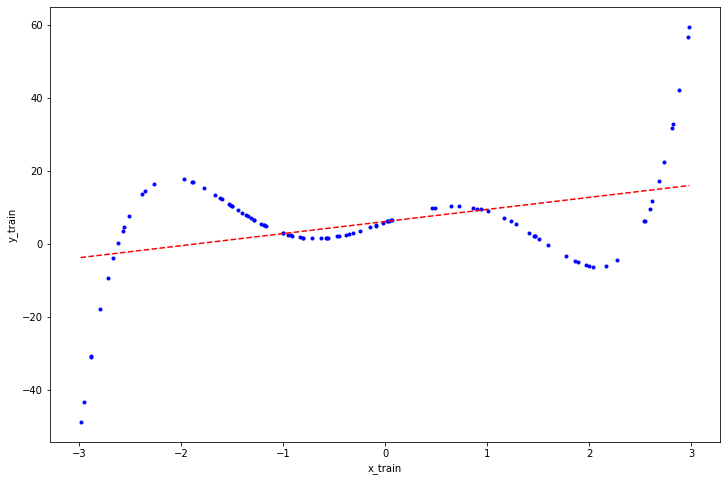

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# This the the cost or objective function. For a linear model, we use least
# mean square to calculate the error in our theta values.
def least_mean_square(y_actual, y_predicted):
      
    # calculating cost (we want the cost to be 0)
    cost = np.sum( (y_actual - y_predicted) ** 2 ) / len(y_actual)
    return cost


# gradient descent
def gradient_descent(x, y, num_iterations = 10000, learning_rate = 0.001):
    
    # initializing hyperparameters
    current_weight = 0.1
    current_bias = 0.1
    iterations = num_iterations
    alpha = learning_rate
    n = float(len(x))
      
    # estimating optimal parameters (theta values)
    for i in range(iterations):
        
        # predicting the y value from the linear equation y = mx + b
        y_predicted = (current_weight * x) + current_bias
          
        # calculating the current cost
        current_cost = least_mean_square(y, y_predicted)
          
        # calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y - y_predicted))
        bias_derivative = -(2/n) * sum(y - y_predicted)
          
        # updates weights and bias at the set learning rate
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

        print("Iteration {}: Cost: {}, Weight: {}, Bias: {}".format(i, current_cost, current_weight, current_bias))
      
    return current_weight, current_bias


def main():
    
    # Data
    x_test = np.load('x_test.npy')
    y_test = np.load('y_test.npy')
    x_train = np.load('x_train.npy')
    y_train = np.load('y_train.npy')
    
    # flattening data to go from (1, 0) to (1,) in order to match the dimension of the y_train data
    x_train = x_train.flatten('C')

    # estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(x_train, y_train)
    print("Estimated Weight: {} -- Estimated Bias: {}".format(estimated_weight, estimated_bias))

    # Making predictions using estimated parameters
    Y_pred = estimated_weight * x_train + estimated_bias

    # Plotting the regression line
    plt.figure(figsize = (12,8))
    plt.scatter(x_train, y_train, marker='.', color='blue')
    plt.plot([min(x_train), max(x_train)], [min(Y_pred), max(Y_pred)], color='red', markersize=1, linestyle='dashed')
    plt.xlabel("x_train")
    plt.ylabel("y_train")
    plt.show()
  
if __name__=="__main__":
    main()
    